In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import urllib.request as request
import io
from sklearn import preprocessing


# Regressão Logística

O modelo logístico pressupõe que o *logaritmo da razão de chance* de um evento binário é resultado de uma combinação linear de variáveis explicativas (independentes).

Define-se "razão de chance" de um evento (*odds* ou *odds ratio* em Inglês) binário (ou seja, que pode ou não acontecer) como a razão entre a probabilidade do evento acontecer e a probabilidade do evento não acontecer.
Assim, se $p$ é a probabilidade do evento acontecer,

\begin{equation}
\mbox{chance}(p) = \frac{p}{1-p}
\end{equation}

Assim, a hipótese do modelo logistico é:

\begin{equation}
\log_b\left( \frac{p}{1-p}\right) = \Theta ^T X \tag{1}
\end{equation}

onde $X =\left\{x_1, \ldots, x_n\right\}$ é um vetor de variáveis explicativas e $\Theta =\left\{\theta_1, \ldots, \theta_n\right\}$ é vetor com *pesos* a elas atribuído e b é a base dos logaritmos (discutida adiante).

Da equação (1), tira-se:

\begin{equation}
p = h_b(\Theta^T X) = \frac{1}{1+b^{-\Theta^T X}} \tag{2}
\end{equation}


A função $h$ definida em (2) é conhecida como *função logística*.
Nota-se que $1-h(x) = h(-x)$.

## Regressão

Suponha que se tenha um conjunto amostral de $m$ variáveis explicativas $X_i$ e resultados binários $y_i$ (neste caso define-se o valor $1$ para ocorrência e $0$ para a não-ocorrência do evento).

Neste caso, o vetor de pesos $\Theta$ de máxima verossimilhança *sem informação a priori* é dado por:

\begin{equation}
\underset{\Theta}{\mbox{arg max}} \, \prod_i (h_b(\Theta ^T X_i))^{y_i}(h_b(-\Theta ^T X_i))^{1-y_i} \tag{3}
\end{equation}

Note que como $y_i$ vale ou 0 ou 1, cada termo neste produto vale ou $h(\Theta^T X)$ ou $h(-\Theta^T X)$.

O problema de maximização em (3) é consideravelmente mais complexo do que o da regressão linear tradicional.
De todo modo, um problema equivalente, tirando-se o logaritmo na base b do lado esquerdo e multiplicando-se por -1 é:

\begin{equation}
\underset{\Theta}{\mbox{arg min}} \, \sum_i - y_i \log_b h_b(\Theta^T X_i) (1-y_i) \log_B h(-\Theta^T X_i) \tag{4}
\end{equation}

Novamente, note que os termos da soma são ou $\log_b h_B(\Theta^T X)$ (quando o evento acontece) ou $\log_b h_b(-\Theta^T X)$.

A *entropia cruzada* total de uma série aleatória de variáveis binárias $y_i$ em relação a uma sequência de probabilidades  $P=\left\{p_1, \ldots, p_n\right\}$ é definida como:

\begin{equation}
J_P\left[Y\right] = \sum_{y_i=1} - \log_b p_i + \sum_{y_i=0} - \log_b (1-p_i)
\end{equation}

O seu valor médio é naturalmente $J_P\left[Y\right]/n$.

(nota-se que o valor *mínimo* da entropia cruzada é zero e acontece quando $p_i=1$ sempre que $y_i=1$ e $p_i=0$ sempre que $y_i=0$)

O problema da regressão logística como formulado em (4) consiste em minimizar-se a *entropia cruzada* da variável aleatória $y_i$ sob a distribuição $h(\Theta^T X_i)$ definida como:

\begin{equation}
\underset{\Theta}{\mbox{arg min}} \, J_\Theta\left[Y\right] = \sum_{y_i=1}-  \log h_b(\Theta^T X_i) + \sum_{y_i=0}- \log h_b(-\Theta^T X_i) \tag{4}
\end{equation}


Para resolver o problema (4) numericamente, nota-se que:

\begin{equation}
\frac{\partial}{\partial \theta_i} \log_b h_b(\Theta^T X) = h_b(-\Theta^T X)x_i = \left( 1-h_b(\Theta^T X_i)\right)x_i
\end{equation}

Assim,
\begin{equation}
\frac{\partial}{\partial \theta_i} J = \sum_{y_i=1} x_i\left(h_b(\Theta^T X_i)-1\right) + \sum_{y_i=0} x_i h_b(-\Theta^T X_i)\end{equation}

que é o o mesmo que
\begin{equation}
\frac{\partial}{\partial \theta_i} J = \sum_{i} x_i\left(h_b(\Theta^T X_i)-y_i\right)
\end{equation}

Finalmente, a base do logaritmo é arbitrária e define a unidade de informação medida.

Se a base for 2, a informação é medida em *bits* (ou *Shannons*).
Se a base for *e*, a base natural, diz- que a unidade é *nat*.
Finalmente, para a base 10 a informação é medida em *dígitos* (ou *Hartleys*).

Nota-se pela definição em (5), se a base é 2, vale a propriedade de que $J_\Theta[Y] + J_{-\Theta}[Y] = 2n$.
Assim, se $\Theta=0$, a entropia cruzada é exatamente 1 bit por ponto da amostra.

Para classificadores binários, esse é o *pior* resultado possível.
De fato, suponha que exista um vetor $\Theta^*$ para o qual a entropia cruzada de uma variável $Y$ seja *maior* do que 1 bit por variável.
Então o classificador logístico com vetor $-\Theta$ tem produz uma entropia cruzada *menor* do que 1 bit por variável.

# Exercício 1: Regressão linear com valores sintéticos

Uma variável binária valendo 0 ou 1 é sorteada sobre os pontos no plano $x,y$ com probabilidade dada por:

\begin{equation}
p(z=1:x,y) = \frac{1}{1+e^{-(x+0.5y-6)}}
\end{equation}

A variável ```z``` definida abaixo contém uma amostra de 1000 pontos desta variável no retângulo em $x \in [0,10], \, y \in [0,10]$


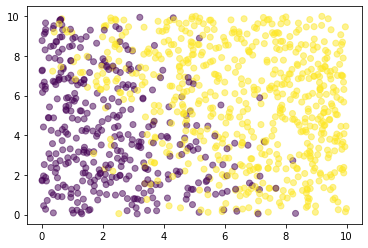

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0, 10, size=1000)
y = np.random.uniform(0, 10, size=1000)
linear = x+0.5*y-6
p = 1/(1+np.exp(-linear))
z = np.random.binomial(n=1, p=p)
plt.scatter(x,y,c=z, alpha=0.5)

## a) Regressão logística dos dados

Use o modelo de regressão logística da biblioteca sklearn para fazer a regressão logística dos dados.

In [0]:
from sklearn.linear_model import LogisticRegression

A função ```LogisticRegression().fit(independentes, res)``` faz a regressão logística entre as variáveis independentes em ```independentes``` com o vetor de resultados em ```res```.

Note que ```independentes``` é uma matriz $n\times m$ onde $n$ é a quantidade de pontos e $m$ o número de variáveis independentes.

A função retorna um objeto do tipo ```LogisticRegression``` que modela a probabilidade do evento como 
\begin{equation}
P(y:x_1, \ldots, x_n) = \frac{1}{1+e^{- w_0 - \sum_i w_i x_i}}
\end{equation}

onde $w_1, \ldots, w_n$ são os pesos de cada variável independente e $w_0$ é o termo *de interceptação*.
 O vetor com os pesos de cada variável está no atributo ```coef_``` e o termo de interceptação  está no atributo ```intercept_```.

Use a função ```LogisticRegression().fit(independentes, res)``` para prever a variávez ```z``` em termos das variáveis ```x``` e ```y``` definidas acima.
Mostre os coeficientes em ```x```, ```y``` e o termo de interceptação.
 Compare com os valores 1, 0,5 e -6.

In [4]:
ind = np.vstack((x, y))
model = LogisticRegression().fit(ind.T, z)
print("Termo independente:", model.intercept_)
print("Coeficientes:", model.coef_)

Termo independente: [-5.84716354]
Coeficientes: [[0.97106948 0.46684516]]


## b) Prevendo resultados

O modelo gerado no item a) pode prever o valor do resultado dado um conjunto de variáveis independentes.

O método ```model.predict(independentes)``` faz a previsão.
O parâmetro ```independentes``` é uma matriz cujas linhas são os pontos no espaço das variáveis independentes sobre os quais se fazer a previsão.

Repita a plotagem do enunciado mas substitua a variável ```z``` no parâmetro ```c``` pela previsão do modelo.

Compare a figura com a do enunciado.

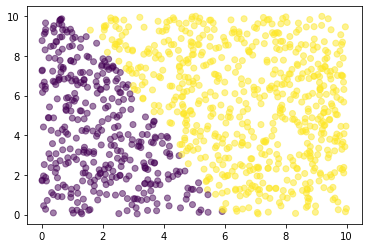

In [5]:
forecast = model.predict(ind.T)
plt.scatter(x,y,c=forecast, alpha=0.5)

## c) Cálculo de probabilidades

O método ```model.predict(independentes)``` calcula um vetor de probabilidades para cada possível valor da variável prevista.

Use este método para calcular as probabilidades de cada resultado em (0,0), (6,0) e (10,0).

In [6]:
probabilidade = model.predict_proba(ind.T)
print(probabilidade[0])
print(probabilidade[6])
print(probabilidade[10])


[0.00169288 0.99830712]
[0.22219067 0.77780933]
[0.08585654 0.91414346]


### d) Matriz de confusão

Usando novamente os pontos x, y do enunciado, motre a matriz de confusão da previsão com os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

Motre os valores de sensibilidade (verdadeiros positivos/positivos), especificidade (verdadeiros negativos/negativos) e precisão (verdadeiros positivos/previstos positivos) para o preditor.


In [7]:
from sklearn.metrics import confusion_matrix
print("Matriz de confusão")
confusion_matrix(z, forecast)

Matriz de confusão


array([[295,  72],
       [ 70, 563]])

# Exercício 2: Regressão Logística multinomial

A regressão logística multinomial extende o princípio da regressão logística para casos em que a variável dependente pode assumir mais do que somente dois valores (mas ainda assim um conjunto discreto de valores).

O exemplo a seguir mostra 3 conjuntos distintos de pontos, um centrado em (0,0), um centrado em (2,0) e um centrado em (1,1).
A cada um é atribuído um rótulo distinto em (0,1,2).

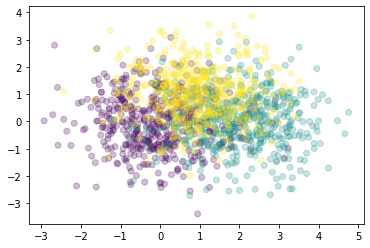

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(0, 1, size=500)
y1 = np.random.normal(0, 1, size=500)
z1 = np.full(500,0)
x2 = np.random.normal(2, 1, size=500)
y2 = np.random.normal(0, 1, size=500)
z2 = np.full(500,1)
x3 = np.random.normal(1, 1, size=500)
y3 = np.random.normal(1, 1, size=500)
z3 = np.full(500,2)
xtotal = np.concatenate((x1,x2,x3))
ytotal = np.concatenate((y1,y2,y3))
ztotal = np.concatenate((z1,z2,z3))
plt.scatter(xtotal,ytotal,c=ztotal, alpha=0.25)
plt.show()

A função ```LogisticRegression().fit(independentes, res)``` também pode fazer a regressão multinomial.

Há dois tipos distintos de regressão multinomial.
Estamos aqui interessados na regressão do tipo "um versus todos", que consiste em criar múltiplas regressões lineares para cada possível valor de variável dependente.

A previsão é feita selecionando-se o valor mais provável em cada ponto.

Selecione a regressão "um versus todos" com o parâmetro  ```LogisticRegression(multi_class='ovr').fit(independentes, res)```.

Faça a aproximação dos pontos por uma regressão multinomial e repita a plotagem do enunciado usando para cores os valores *previstos* de z.

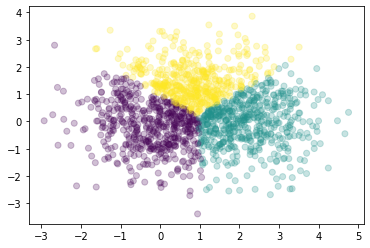

In [9]:
ind = np.vstack((xtotal, ytotal))
model = LogisticRegression(multi_class='ovr').fit(ind.T, ztotal)
plt.scatter(xtotal,ytotal,c=model.predict(ind.T), alpha=0.25)
plt.show()


# Exercício 3: Prevendo Rotatividade (churn) de clientes

Adaptado do material disponibilizado por Saeed Aghabozorgi.
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>

O _Telco Churn_ é um arquivo de dados hipotéticos que diz respeito aos esforços de uma empresa de telecomunicações para reduzir o volume de negócios perdidos em sua base de clientes. Cada caso corresponde a um cliente separado e registra várias informações demográficas e de uso do serviço.
A seguinte célula recupera os dados do _Telco Churn_ e coloca-os em um DataFrame.



In [10]:
churn_df = pd.read_csv(io.TextIOWrapper(request.urlopen("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")))
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Entendendo os dados
Usaremos um conjunto de dados de telecomunicações para prever a rotatividade de clientes. Este é um conjunto de dados histórico do cliente em que cada linha representa um cliente. Os dados são relativamente fáceis de entender e você pode descobrir insights que você pode usar imediatamente. Normalmente, é mais barato manter os clientes do que adquirir novos, portanto, o foco dessa análise é prever os clientes que permanecerão na empresa.

Esse conjunto de dados fornece informações para ajudá-lo a prever o comportamento que ajudará você a manter os clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas de retenção de clientes.

O conjunto de dados inclui informações sobre:

- Clientes que saíram no último mês - a coluna chama-se Churn
- Serviços para os quais cada cliente se inscreveu - telefone, várias linhas, internet, segurança on-line, backup on-line, proteção de dispositivos, suporte técnico e transmissão de TV e filmes
- Informações da conta do cliente - por quanto tempo eles foram cliente, contrato, forma de pagamento, faturamento digital, cobranças mensais e cobranças totais
- Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes.


Vamos selecionar alguns dados para modelagem:

In [0]:
valores_explicativos = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
churn_real = np.asarray(churn_df['churn'], dtype=np.int)

Note que a variável ```churn_real``` é forçada a adotar valores inteiros.
Isso é uma necessidade do objeto ```LinearRegression```.

Ademais, vamos normalizar as variáveis independentes:

In [0]:
from sklearn import preprocessing
normalizados = preprocessing.StandardScaler().fit(valores_explicativos).transform(valores_explicativos)

Finalmente, vamos dividir o conjunto de dados aleatoriamente em dois subconjuntos, um de treinamento e um de testes.
Vamos usar 80% dos dados para treinamento e 20% para testes.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalizados, churn_real, test_size=0.2)

## a) Crie um modelo de regressão Logística para os dados de treinamento

Use as variáveis ```X_train``` como as variáveis independentes e as variáveis ```y_train``` como variáveis independentes.

Mostre o valor dos coeficientes de cada parâmetro independente e do coeficiente de interceptação.

In [14]:
model = LogisticRegression().fit(X_train, y_train)
print("Coeficientes:",model.coef_)
print("Independente:",model.intercept_)

Coeficientes: [[-0.61867638 -0.33983497 -0.08420912 -0.14267656  0.17129264 -0.40457627
   0.43431755]]
Independente: [-1.35693938]


## b) Mostre a matriz de confusão do modelo gerado no item a) usando os valores de teste.

Compare os resultados previstos para ```x_test``` com os esperados em ```y_test```.
Mostre a matriz de confusão.

In [15]:
print("Matriz de confusão")
confusion_matrix(y_test, model.predict(X_test))

Matriz de confusão


array([[24,  2],
       [10,  4]])

# Exercício 4: Criando um *ranking* de competidores a partir de resultados 1x1.

## a) Resultados dos pontos corridos do Campoeonato Brasileiro

O arquivo em [https://www.lsc.poli.usp.br/jogos_brasileirao_serie_a.csv](https://www.lsc.poli.usp.br/jogos_brasileirao_serie_a.csv) contém todos os resultados do Campeonato Brasileiro da série A de 2006 a 2019.

A linha abaixo carrega o arquivo em um DataFrame Pandas chamado ```jogos_campeonato_brasileiro```.
Cada time é identificado por três letras.
A lista completa de times está na variável ```times```.
O dicionário ```time_indice``` contém uma tabela com o índice de cada time na variável ```times```.

In [16]:
jogos_campeonato_brasileiro=pd.read_csv(io.TextIOWrapper(request.urlopen("https://www.lsc.poli.usp.br/jogos_brasileirao_serie_a.csv")))
times = jogos_campeonato_brasileiro['Mandante'].unique()
time_indice = {}
for i, x in enumerate(times):
  time_indice[x] = i
jogos_campeonato_brasileiro.head()

,Unnamed: 0,Ano,Mandante,Visitante,Placar_Mandante,Placar_Visitante,res
0,0,2006,BOT,ATP,0,4,-1
1,1,2006,COR,ATP,2,1,1
2,2,2006,CRU,ATP,1,1,0
3,3,2006,FIG,ATP,3,3,0
4,4,2006,FLA,ATP,1,0,1


A coluna ```res``` contém uma variável com 1 se o mandante do jogo ganhou, 0 se empatou e -1 se perdeu.

Suponha que o resultado seja explicado por uma variável independente da forma $X = \{x_1, \ldots, x_n\}$ com n igual ao total de times.
Nesta variável, para um determinado jogo, $x_i=1$ se o $i$-gésimo time jogou como mandante, $x_i=-1$ se o $i$-gésimo time jogou como visitante e 0 se não jogou.

Naturalmente, para todos os pontos, tem-se somente um coeficiente com 1, somente um coeficiente com -1 e o restante zero.

A função ```cria_vetor_x``` gera um vetor deste tipo dada uma linha de um jogo.

In [0]:
def cria_vetor_x(linha):
  x = np.zeros(len(times))
  x[time_indice[linha["Mandante"]]]=1
  x[time_indice[linha["Visitante"]]]=-1
  return x

Exemplo: Eis o vetor x correspondente ao jogo em que a Juventus recebeu o Atlético de Paranaiba em 2006:

In [18]:
print(jogos_campeonato_brasileiro.iloc[10])
print(cria_vetor_x(jogos_campeonato_brasileiro.iloc[10]))

Unnamed: 0            10
Ano                 2006
Mandante             JUV
Visitante            ATP
Placar_Mandante        3
Placar_Visitante       2
res                    1
Name: 10, dtype: object
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


Crie um modelo multinomial de regressão logística para prever o resultado entre dois times.

Use este modelo para prever o resultado de um jogo em que o Palmeiras (```PAL```) recebe o Corinthians (```COR```).
Faça uma regressão multinomial do tipo "um-contra-todos".

In [19]:
independentes = np.array([cria_vetor_x(jogos_campeonato_brasileiro.iloc[j]) for j in range(jogos_campeonato_brasileiro.shape[0])])

model = LogisticRegression(multi_class='ovr').fit(independentes, jogos_campeonato_brasileiro['res'])
jogo = np.zeros((1,len(times)))
jogo[0][time_indice["PAL"]] = -1
jogo[0][time_indice["COR"]] = 1

model.predict(jogo)

array([1])



## b) Criando um Ranking de times com pontuação

Suponha por hora que o resultado de um jogo pode ser somente vitória do mandante ou vitória do visitante (vamos ignorar o empate).

Suponha que a probabilidade do time mandante vencer é modelada por:

\begin{equation}
p = \frac{1}{1+e^{-(w_0 + w_m -w_v)}} 
\end{equation}

onde $w_m$ é a *pontuação* do time mandante e $w_v$, a *pontuação* do time visitante e $w_0$ é uma constante relacionada com a vantagem inerente do time mandante, qualquer que seja.

Em um cenário no qual não há empates, é possível obter esta pontuação fazendo-se a regressão logística do resultado "vitória do mandante" usando a mesma convenção do item a).

Um empate pode ser visto como a *sobreposição de dois resultados*: vitória do mandante e vitória do visitante. É possível assim aplicar este modelo a resultados com empate.
Há somente um problema com essa abordagem: Como cada empate produz dois resultados, os empates ficam super-representados no modelo.
É possível no entanto atribuir *pesos* às amostras na regressão logística.
Por exemplo, para o objeto ```LogisticRegression``` da biblioteca sklearn, o modelo é criado com ```LogisticRegression().fit(independentes, res)```.

Crie uma pontuação para todos os times que participaram no Campeonato Brasileiro.

Para tanto crie 3 vetores, ```X```, ```y```, e ```pesos```.

Para cada resultado com vitória em ```jogos_campeonato_brasileiro```, adicione uma entrada em ```X``` com o vetor dos participantes, seguindo a mesma convenção do item a), uma entrada em ```y``` com 1 se o mandante ganhou, 0 se o mandante perdeu e uma entrada em ```pesos``` com 1.

Para cada resultado com empate, adicione *duas* entradas em ```X``` com o vetor dos participantes (duplicado), *duas* entradas em ```y``` com 1 e 0 e *duas* entradas em ```pesos``` com 0.5.

Faça a regressão linear com os dados e obtenha o coeficiente de cada time.
Mostre os times na ordem decrescente de coeficiente.

In [0]:
def cria_vetores(linha):
  x = np.zeros(len(times))
  x[time_indice[linha["Mandante"]]]=1
  x[time_indice[linha["Visitante"]]]=-1

  if linha["Placar_Mandante"] == linha["Placar_Visitante"]:
    y = np.array([1, 0])
    pesos = np.array([.5, .5])
    x = np.vstack([x, x])

  elif linha["Placar_Mandante"] > linha["Placar_Visitante"]:
    y = np.array([1])
    pesos = np.array([1])

  else:
    y = np.array([0])
    pesos = np.array([1])

  return x, y, pesos

In [0]:
x = np.empty((0, len(times)))
y = np.empty(0)
pesos = np.empty(0)

for j in range(jogos_campeonato_brasileiro.shape[0]):
  x_temp, y_temp, pesos_temp = cria_vetores(jogos_campeonato_brasileiro.iloc[j])
  x = np.vstack([x, x_temp])
  y = np.append(y, y_temp)
  pesos = np.append(pesos, pesos_temp)

In [22]:
model = LogisticRegression().fit(x, y, pesos)
pd.DataFrame(model.coef_[0], times, columns=["Coef"]).sort_values("Coef", ascending=False)

,Coef
SPA,0.676641
GRE,0.632436
FLA,0.556660
COR,0.550040
INT,0.489637
PAL,0.468457
CRU,0.465703
SAN,0.465703
ATM,0.412484
FLU,0.320496
